In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn.under_sampling import *
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from collections import Counter
from sklearn.svm import SVC
import seaborn as sns

import pickle

In [52]:
# sample
a="hi"
with open("filename.pickle",'wb') as fw:
    pickle.dump(a,fw)
    
with open("filename.pickle",'rb') as fr:
    loaded_a=pickle.load(fr)
loaded_a

# smote_10
smote_10 = {"accuracy": 0.8809923975487377,
            "roc-auc-score": 0.7273423574813745,
            "recall": 0.17945426945908255,
            "precision": 0.3237160221732452,
            "f1-score": 0.2309048178613396}
with open("smote_10.pickle",'wb') as fw:
    pickle.dump(smote_10,fw)

In [2]:
df = pd.read_csv("WSDM_train_full_features.csv") ;

In [3]:
target0_df = df[df["target"]==0]
target1_df = df[df["target"]==1]

1    50.351708
0    49.648292
Name: target, dtype: float64


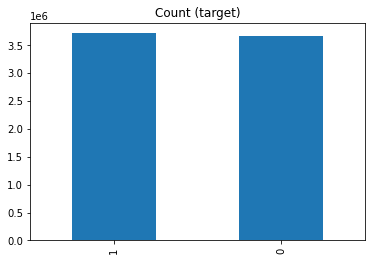

In [4]:
df.target.value_counts().plot(kind='bar', title='Count (target)')
print(df.target.value_counts(normalize=True)*100)

# 1이 10% 0이 90%

In [56]:
target0_df.shape[0]/9

406973.55555555556

0    89.99999
1    10.00001
Name: target, dtype: float64


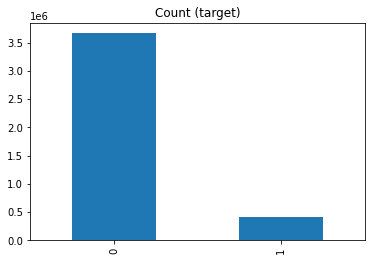

In [5]:
target1_df10 = target1_df.sample(n=406974) # 10퍼센트
df_10=pd.concat([target0_df,target1_df10],axis=0)
df_10.target.value_counts().plot(kind='bar', title='Count (target)')
print(df_10.target.value_counts(normalize=True)*100)

In [58]:
df_10.target.value_counts()

0    3662762
1     406974
Name: target, dtype: int64

In [11]:
X = df_10.drop(columns=['target']).values
y = df_10["target"].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [8]:
#Training with imbalance data
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
# RF.fit(X_train,y_train)
# pred=pd.DataFrame(RF.predict(X_test))
# pred

In [21]:
X

,user_idx,song_idx,ssn_idx,sst_idx,st_idx,song_length,genr_idx,art_idx,com_idx,lyr_idx,...,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
12,3,12,2,1,3,280084,0,7,181,1794,...,0,1,0,0,0,0,0,0,5740,115325
18,3,18,2,1,3,265743,0,7,8,23217,...,0,1,0,0,0,0,0,0,2284,115325
24,6,24,4,1,0,292060,14,2338,308,2,...,0,2,0,0,0,0,0,0,6,715
25,6,25,4,1,0,131239,14,1693,308,2,...,0,2,0,0,0,0,0,1,1,1768
26,6,26,4,1,0,307200,0,90069,2,2,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005555,23000,110176,1,1,2,91371,18,5125,2,2,...,0,1,0,0,0,0,0,1,25,6062
3863475,9548,147052,1,1,2,249469,7,14010,2,2,...,0,1,0,0,0,0,0,0,6,207
453975,2497,405,4,3,0,232333,0,1092,2082,24097,...,1,1,0,0,0,0,0,1,7133,57040
214108,8400,323,1,1,2,298945,0,11646,12803,6022,...,0,1,0,0,0,0,0,0,7268,12727


In [42]:
pip install mglearn

     |████████████████████████████████| 540 kB 1.2 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=68a4a0894b2d8d291ce92cf951cfb9d9a3eaba80348064a071216fd5bb1a15f2
  Stored in directory: /Users/hyunji/Library/Caches/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 2, stop = X_set[:, 0].max() + 2, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 2, stop = X_set[:, 1].max() + 2, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

MemoryError: Unable to allocate 806. TiB for an array with shape (35996700, 3075800) and data type float64

In [62]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [31]:
#imbalance data with Accuracy
print("accuracy:", accuracy_score(y_test, pred))
#imbalance data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba))
#imbalance data with Recall
print("recall:",recall_score(y_test, pred))
#imbalance data with Precision
print("precision:",precision_score(y_test, pred))
#imbalance data with F1-score
print("f1-score:",f1_score(y_test, pred))

accuracy: 0.8988940325426195
roc-auc-score: 0.7180400223671922
recall: 0.029113033605252442
precision: 0.3942179144385027
f1-score: 0.05422178295197269


# SMOTE

In [32]:
#importing SMOTE
from imblearn.over_sampling import *
#Oversampling the data
#Training with oversampled data
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
X_sm, y_sm = SMOTE(random_state=0,k_neighbors=5,n_jobs=-1).fit_resample(X_train, y_train)
RF.fit(X_sm,y_sm)
pred_sm=pd.DataFrame(RF.predict(X_test))
pred_sm

,0
0,0
1,0
2,0
3,0
4,0
...,...
813943,0
813944,0
813945,0
813946,0


In [37]:
print('Resampled dataset shape %s' % Counter(y_sm))

Resampled dataset shape Counter({0: 2929843, 1: 2929843})


In [33]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba=pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba

,0
0,0.06
1,0.23
2,0.13
3,0.15
4,0.29
...,...
813943,0.49
813944,0.01
813945,0.20
813946,0.44


In [34]:
#smote data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_sm))
#smote data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba))
#smote data with Recall
print("recall:",recall_score(y_test, pred_sm))
#smote data with Precision
print("precision:",precision_score(y_test, pred_sm))
#smote data with F1-score
print("f1-score:",f1_score(y_test, pred_sm))

accuracy: 0.8809923975487377
roc-auc-score: 0.7273423574813745
recall: 0.17945426945908255
precision: 0.3237160221732452
f1-score: 0.2309048178613396


# SMOTE + Tomek

In [ ]:
from imblearn.combine import *

X_smtm, y_smtm = SMOTETomek(random_state=0, sampling_strategy='all',n_jobs=-1).fit_sample(X_train, y_train)
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_smtm,y_smtm)
pred_smtm=pd.DataFrame(RF.predict(X_test))
pred_proba=pd.DataFrame(RF.predict_proba(X_test)[:, 1])
pred_proba

In [ ]:
#smtm data with Accuracy
print("accuracy:", accuracy_score(y_test, pred_smtm))
#smtm data with ROC-AUC
# print("roc-auc-score:",roc_auc_score(y_test,pred))
print("roc-auc-score:",roc_auc_score(y_test,pred_proba))
#smtm data with Recall
print("recall:",recall_score(y_test, pred_smtm))
#smtm data with Precision
print("precision:",precision_score(y_test, pred_smtm))
#smtm data with F1-score
print("f1-score:",f1_score(y_test, pred_smtm))

# under-sampling methods

### RandomUnderSampler 
### 무작위

In [40]:
from imblearn.under_sampling import *
X_rus, y_rus = RandomUnderSampler(sampling_strategy =1,random_state=0).fit_resample(X_train, y_train)
# sampleing_strategy = minarity / majarity
RF.fit(X_rus, y_rus)
pred_rus=pd.DataFrame(RF.predict(X_test))
pred_proba_rus=pd.DataFrame(RF.predict_proba(X_test)[:, 1])

In [77]:
print("original ratio")
print(y_train.value_counts())

print("RandomUnderSampler")
print(y_rus.value_counts())

original ratio
0    2929843
1     325945
Name: target, dtype: int64
RandomUnderSampler
0    325945
1    325945
Name: target, dtype: int64


In [39]:
#rus data with Accuracy
print("rus_accuracy:", accuracy_score(y_test, pred_rus))
#rus data with ROC-AUC
print("rus_roc-auc-score:",roc_auc_score(y_test,pred_proba_rus))
#rus data with Recall
print("rus_recall:",recall_score(y_test, pred_rus))
#rus data with Precision
print("rus_precision:",precision_score(y_test, pred_rus))
#rus data with F1-score
print("rus_f1-score:",f1_score(y_test, pred_rus))

rus_accuracy: 0.6507319877928319
rus_roc-auc-score: 0.7096429607313157
rus_recall: 0.6632810475261943
rus_precision: 0.17295420390220984
rus_f1-score: 0.2743659642244548


rus_accuracy: 0.6507319877928319  
rus_roc-auc-score: 0.7096429607313157  
rus_recall: 0.6632810475261943  
rus_precision: 0.17295420390220984  
rus_f1-score: 0.2743659642244548  

accuracy: 0.8988940325426195  
roc-auc-score: 0.7180400223671922  
recall: 0.029113033605252442  
precision: 0.3942179144385027  
f1-score: 0.05422178295197269  

모델이 1이라 한것중에 실제 1 을 맞춘 비율이 낮아짐 (precision)
0이엄청많은상태에서 학습했으면 test에서도 0을 예측하는 값이 많아짐
undersampling 전에는 1로 예측하는게 적어서 precision 분모가 작음
반면 undersampling 하면 클래스가 반반이여서 샘플링 전보다 0이라 예측하는게적음 1이라 예측이 많아짐 -> 분모커짐
precision이 작아짐

In [10]:
# X00, y00 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
#                                n_classes=2, n_clusters_per_class=1, class_sep=0.8, 
#                                weights=[0.99, 0.01], random_state=0)
# X0, X_test, y0, y_test = train_test_split(X00, y00, test_size=0.25, random_state=12345)

x1_min = X0[:, 0].min() - 2
x1_max = X0[:, 0].max() + 2
x2_min = X0[:, 1].min() - 2
x2_max = X0[:, 1].max() + 2

def plot_samples(X=None, y=None):
    XX, YY = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]
#     params = {'kernel': 'linear'}
#    params = {'kernel': 'rbf', 'gamma': 1}
    if X is None:
        plt.figure(figsize=(7,7))
        X = X_train
        model = RF().fit(X_train, y_train)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.title(Counter(y_train))
    else:
        plt.figure(figsize=(14,7))
        plt.subplot(121)
        model = RF().fit(X_train, y_train)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y_train, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y_train))
        plt.subplot(122)
        model = RF().fit(X, y)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y))
        plt.tight_layout()
    plt.show()
    
    return model.predict(X)
    
y_pred = plot_samples()

SyntaxError: invalid syntax (<ipython-input-10-41218dbf1527>, line 11)

## NearMiss-1 
### 아웃라이어를 없애는

In [40]:
X_nm1,Y_nm1 = NearMiss(sampling_strategy='auto',version=1, n_neighbors=3,n_jobs=-1).fit_resample(X_train,y_train)
RF.fit(X_nm1,Y_nm1)
pred_nm1=pd.DataFrame(RF.predict(X_test))
pred_proba_nm1=pd.DataFrame(RF.predict_proba(X_test)[:, 1])

In [41]:
#nm1 data with Accuracy
print("nm1_accuracy:", accuracy_score(y_test, pred_nm1))
#nm1 data with ROC-AUC
print("nm1_roc-auc-score:",roc_auc_score(y_test,pred_proba_nm1))
#nm1 data with Recall
print("nm1_recall:",recall_score(y_test, pred_nm1))
#nm1 data with Precision
print("nm1_precision:",precision_score(y_test, pred_nm1))
#nm1 data with F1-score
print("nm1_f1-score:",f1_score(y_test, pred_nm1))

nm1_accuracy: 0.24233734833183446
nm1_roc-auc-score: 0.4403920696970796
nm1_recall: 0.7384393241925731
nm1_precision: 0.09130389004774628
nm1_f1-score: 0.1625138517697673


accuracy: 0.8988940325426195  
roc-auc-score: 0.7180400223671922  
recall: 0.029113033605252442  
precision: 0.3942179144385027  
f1-score: 0.05422178295197269  

f1스코어는 리콜값에 종속되어 좋아진것
recall 이 좋아진 이유만 알면됨

accuracy -> 다수클래스를 지워서 다수클래스로 판단하는 비율이 적어져서 정확도 떨어짐 (데이터를 삭제해버려서 경계선이 움직임) 그래서 정확도는 낮아진다 0이 있는데 삭제해버렸으니까 정확도는 낮아짐  

recall -> 전체 1중에 1이라고 판단하는게 많아짐, 0으로 판단하는 값이 적어지고 1로 판단하는 값이 많아져서 실제값이 1인것중에 1이라고 판단하는 비율이 높아짐
precision - > throw-back, 1이라고 예측한거중에 0 이 많기 때문에 낮아짐 , 모델이 옮겨지니까 사실 0인데 1로 판단하는 경우가 많아지니까 test에선 경계안에 0 이 그대로있어서 (테스트는 그대로 두고 트레인에서 리샘플했을 때 테스트 결과)  


0을 못맞추는 비율이 더큼 ->정확도낮아짐  

## NearMiss-2

In [ ]:
X_nm2,Y_nm2 = NearMiss(sampling_strategy='auto',version=2, n_neighbors=3,n_jobs=-1).fit_resample(X_train,y_train)
RF.fit(X_nm2,Y_nm2)
pred_nm2=pd.DataFrame(RF.predict(X_test))
pred_proba_nm2=pd.DataFrame(RF.predict_proba(X_test)[:, 1])

In [ ]:
#nm2 data with Accuracy
print("nm2_accuracy:", accuracy_score(y_test, pred_nm2))
#nm2 data with ROC-AUC
print("nm2_roc-auc-score:",roc_auc_score(y_test,pred_proba_nm2))
#nm2 data with Recall
print("nm2_recall:",recall_score(y_test, pred_nm2))
#nm2 data with Precision
print("nm2_precision:",precision_score(y_test, pred_nm2))
#nm2 data with F1-score
print("nm2_f1-score:",f1_score(y_test, pred_nm2))

## NearMiss-3

In [ ]:
X_nm3,Y_nm3 = NearMiss(version=3, n_neighbors_ver3=3).fit_resample(X_train,y_train)
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_nm3,Y_nm3)
pred_nm3=pd.DataFrame(RF.predict(X_test))
pred_proba_nm3=pd.DataFrame(RF.predict_proba(X_test)[:, 1])

In [ ]:
#nm3 data with Accuracy
print("nm3_accuracy:", accuracy_score(y_test, pred_nm3))
#nm3 data with ROC-AUC
print("nm3_roc-auc-score:",roc_auc_score(y_test,pred_proba_nm3))
#nm3 data with Recall
print("nm3_recall:",recall_score(y_test, pred_nm3))
#nm3 data with Precision
print("nm3_precision:",precision_score(y_test, pred_nm3))
#nm3 data with F1-score
print("nm3_f1-score:",f1_score(y_test, pred_nm3))

# CNN

In [ ]:
X_cnn,y_cnn = CondensedNearestNeighbour(sampling_strategy='auto',random_state=0,n_jobs=-1).fit_resample(X_train, y_train)
RF.fit(X_cnn,Y_cnn)
pred_cnn=pd.DataFrame(RF.predict(X_test))
pred_proba_cnn=pd.DataFrame(RF.predict_proba(X_test)[:, 1])


In [ ]:
#cnn data with Accuracy
print("cnn_accuracy:", accuracy_score(y_test, pred_cnn))
#cnn data with ROC-AUC
print("cnn_roc-auc-score:",roc_auc_score(y_test,pred_proba_cnn))
#cnn data with Recall
print("cnn_recall:",recall_score(y_test, pred_cnn))
#cnn data with Precision
print("cnn_precision:",precision_score(y_test, pred_cnn))
#cnn data with F1-score
print("cnn_f1-score:",f1_score(y_test, pred_cnn))

# ENN

# 경계선을 분명하게해줌

In [ ]:
X_enn,y_enn = EditedNearestNeighbours(sampling_strategy='auto',kind_sel="all",n_neighbors=3,n_jobs=-1,random_state=0).fit_resample(X_train, y_train)
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_enn,Y_enn)
pred_enn=pd.DataFrame(RF.predict(X_test))
pred_proba_enn=pd.DataFrame(RF.predict_proba(X_test)[:, 1])


In [ ]:
#enn data with Accuracy
print("enn_accuracy:", accuracy_score(y_test, pred_enn))
#enn data with ROC-AUC
print("enn_roc-auc-score:",roc_auc_score(y_test,pred_proba_enn))
#enn data with Recall
print("enn_recall:",recall_score(y_test, pred_enn))
#enn data with Precision
print("enn_precision:",precision_score(y_test, pred_enn))
#enn data with F1-score
print("enn_f1-score:",f1_score(y_test, pred_enn))

# RepeatedEditedNearestNeighbours

In [ ]:
X_renn,y_renn = RepeatedEditedNearestNeighbours(sampling_strategy = "auto",kind_sel="all",n_neighbors=3,n_jobs=-1,random_state=0,max_iter=100).fit_resample(X_train, y_train)
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_renn,Y_renn)
pred_renn=pd.DataFrame(RF.predict(X_test))
pred_proba_renn=pd.DataFrame(RF.predict_proba(X_test)[:, 1])


In [ ]:
#renn data with Accuracy
print("renn_accuracy:", accuracy_score(y_test, pred_renn))
#renn data with ROC-AUC
print("renn_roc-auc-score:",roc_auc_score(y_test,pred_proba_renn))
#renn data with Recall
print("renn_recall:",recall_score(y_test, pred_renn))
#renn data with Precision
print("renn_precision:",precision_score(y_test, pred_renn))
#renn data with F1-score
print("renn_f1-score:",f1_score(y_test, pred_renn))

# TomekLinks

In [ ]:
X_tm, y_tm = TomekLinks(sampling_strategy='auto',n_jobs=-1).fit_resample(X_train, y_train)
RF=RandomForestClassifier(random_state=0,n_jobs=-1)
RF.fit(X_tm,y_tm)
pred_tm=pd.DataFrame(RF.predict(X_test))
pred_proba_tm=pd.DataFrame(RF.predict_proba(X_test)[:, 1])

In [ ]:
#tomek data with Accuracy
print("tomek_accuracy:", accuracy_score(y_test, pred_tm))
#tomek data with ROC-AUC
print("tomek_roc-auc-score:",roc_auc_score(y_test,pred_proba_tm))
#tomek data with Recall
print("tomek_recall:",recall_score(y_test, pred_tm))
#tomek data with Precision
print("tomek_precision:",precision_score(y_test, pred_tm))
#tomek data with F1-score
print("tomek_f1-score:",f1_score(y_test, pred_tm))

# 0.1%

In [23]:
target0_df.shape[0]/999

3666.4284284284286

0    99.900012
1     0.099988
Name: target, dtype: float64


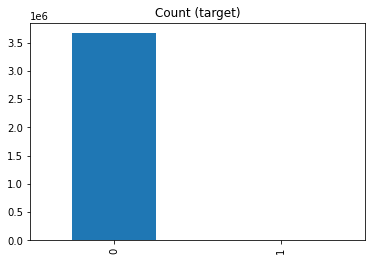

In [24]:
target1_df01 = target1_df.sample(n=3666) # 0.1퍼센트
df_01=pd.concat([target0_df,target1_df01],axis=0)
df_01.target.value_counts().plot(kind='bar', title='Count (target)')
print(df_01.target.value_counts(normalize=True)*100)

# 1%

In [15]:
target0_df.shape[0]/99

36997.59595959596

0    98.999989
1     1.000011
Name: target, dtype: float64


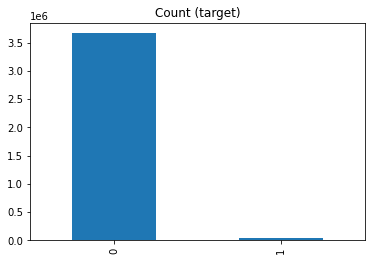

In [25]:
target1_df1 = target1_df.sample(n=36998) # 1퍼센트
df_1=pd.concat([target0_df,target1_df1],axis=0)
df_1.target.value_counts().plot(kind='bar', title='Count (target)')
print(df_1.target.value_counts(normalize=True)*100)